# Network visualization
In this assignment, you will visualize a network. You have the flexibility to choose any visualization tool. But here are some suggestions for the tools:
- [igraph](https://igraph.org/python/tutorial/0.9.6/visualisation.html)
- [graph_tool](https://graph-tool.skewed.de/)
- [networkx](https://networkx.org/documentation/stable/index.html)
- [Gephi](https://gephi.org/)
- [Cytoscape](https://cytoscape.org/)

The choice of visualization tools depends on whether the visualization is exploratory or explanatory. Exploratory visualization is used for generating hypotheses, while explanatory visualization aims to demonstrate focal patterns in data. A powerful visualization can serve both purposes. Gephi and Cytoscape are good options for exploratory visualization as they offer interactive visualizations. Other tools lean more towards explanatory visualization, and provides a greater level of customization.

In my personal opinion, Gephi and Cytoscape offer interactive visualizations with a GUI interface. However, these tools require manual configurations and may not be ideal if you need to create multiple visualizations. I personally prefer `igraph` and `graph_tool` as they are scalable, generate beautiful vector images, and offer highly customizable visualizations.

# Data

We will use the airport network. The data about the nodes and edges can be found in "airport_network" folder. They are already preprocessed in table format.

In [1]:
import pandas as pd

node_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network/node_table.csv"
)
edge_table = pd.read_csv(
    "https://raw.githubusercontent.com/skojaku/adv-net-sci-course/main/data/airport_network/edge_table.csv"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Assignment

Q1. The airport network has regional clusters, in which two airports in the same geographical region (e.g., Europe) are more densely connected to each other than those in different regions. Visualize the network to show the regional clusters. Color nodes by "region" in the node_table.

Q2. Plot the histogram of the node degrees. X axis represents the degree and must be log scale. Y axis represents the probability density and must be linear scale. Use a fixed bin size for the histogram in logarithmic scale.

Q3. Plot the empirical cumulative distribution of the node degrees. Both x and y axes must be log scale.

Q4. Plot the empirical complementary cumulative distribution of the node degrees. Both x and y axes must be log scale.

Q5. Discuss when to use the complementary cumulative distribution over the cumulative distribution.





### Some hints:

#### How to create a color map with Python

Pre-configured color palettes are available in matplotlib and seaborn, for example


In [2]:
import seaborn as sns

cmap = (
    sns.color_palette()
)  # a preconfigured color palette (tab10 with saturation) in seaborn. There are many other color palettes in seaborn. See its documentation.

To specify node colors in `igraph`, you need to create a 1D array of length equal to the number of nodes. Each element in the array (say `node_color`) contains the color of the node. For instance, you can specify the color of $i$th node to be `red` by

In [3]:
n_nodes = 100  # number of nodes
node_color = ["black"] * n_nodes  # color all nodes by black
node_color[3] = "#ff0000"  # set the i=3 node to red

With igraph, once you created the array, pass it to `igraph.plot` with argument `vertex_color`, e.g.,

In [ ]:
import igraph

igraph.plot(
    g,  # igraph object (see the previous assignment for how to construct it)
    vertex_color=node_color,  # color
    layout="random",  # layout algorithm
    bbox=(700, 700),  # bounding box
)  # plot API. You may want to reduce the size of nodes, and change layout algorithm etc.
# Also refer to the API document: https://igraph.org/python/tutorial/0.9.6/tutorial.html#specifying-colors-in-plots

And here are a small example for a visualization of a different network.

/var/folders/j7/9dgqq5g53vnbsbmvh2yqtckr0000gr/T/ipykernel_14629/1117763158.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)  # get the adjacency matrix of a kareate club net


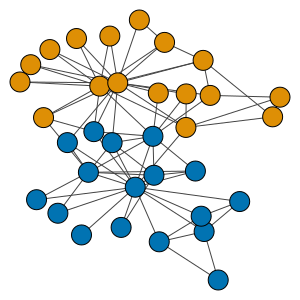

In [4]:
import networkx as nx
from scipy import sparse
import igraph
import seaborn as sns
import numpy as np

# Load a network for demonstration
G = nx.karate_club_graph()  # Load the karate club network from the networkx
A = nx.adjacency_matrix(G)  # get the adjacency matrix of a kareate club net

# Constructing the igraph's network object
src, trg, _ = sparse.find(sparse.triu(A, 1))  # will remove the self-loops
g = igraph.Graph(tuple(zip(src, trg)))

# Node attributes with which to color nodes
node_labels = [l[1]["club"] for l in G.nodes(data=True)]

# Specify node colors
label_names, label_ids = np.unique(
    node_labels, return_inverse=True
)  # uniqify the node attribute
cmap = sns.color_palette("colorblind").as_hex()  # Color map
palette = {
    l: cmap[i] for i, l in enumerate(label_names)
}  # create a dictionary of node labels and color
node_color = [
    palette[node_lab] for node_lab in node_labels
]  # map from node attributes to color with the dictionary

# Plot
igraph.plot(
    g,  # igraph object (see the previous assignment for how to construct it)
    vertex_color=node_color,  # color
    layout="kk",  # layout algorithm
    bbox=(300, 300),  # bounding box
)  # plot API. You may want to reduce the size of nodes, and change layout algorithm etc.
# Also refer to the API document: https://igraph.org/python/tutorial/0.9.6/tutorial.html#specifying-colors-in-plots

And here is another visualization of the same network, with edge bundling.

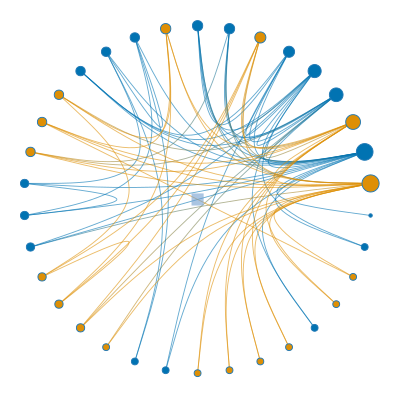

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe062684250, at 0x7fe05041bfd0>,
 <GraphView object, directed, with 35 vertices and 34 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fe05041d160, at 0x7fe05042a5b0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fe05041d160, at 0x7fe05042a400>, False), at 0x7fe05041d160>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe05041d160, at 0x7fe05042a490>)

In [5]:
import graph_tool.all as gt

Gt = g.to_graph_tool()  # convert igraph to graph tool
Gt.vertex_properties["group"] = Gt.new_vertex_property(
    "string", node_color
)  # set a new node attribute `group` and set the node colors
state = gt.minimize_nested_blockmodel_dl(
    Gt
)  # infer the hierarchical structure for edge bundling
state.draw(
    vertex_fill_color=Gt.vp["group"], bg_color="w", output_size=(200, 200)
)  # draw

Edge bundling is particularly useful for larger and more complex networks. For instance, 

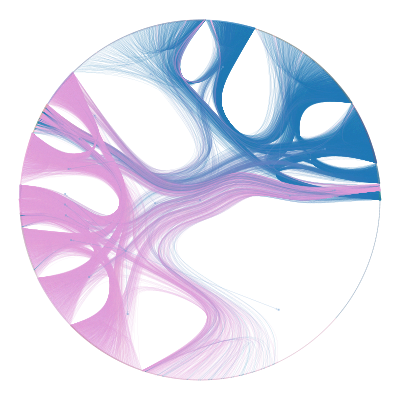

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe061944a60, at 0x7fe05041be80>,
 <GraphView object, directed, with 1515 vertices and 1514 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fe05041bac0, at 0x7fe050411250>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fe05041bac0, at 0x7fe050411040>, False), at 0x7fe05041bac0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe05041bac0, at 0x7fe050411760>)

In [6]:
Gpol = gt.collection.data["polblogs"]  # a political blog network
state = gt.minimize_nested_blockmodel_dl(Gpol)  # infer the hierarchical structure
state.draw(
    vertex_fill_color=Gpol.vp["value"],
    bg_color="w",
    output_size=(200, 200),
)

#### How to draw histogram and cumulative distribution

You have the freedom to utilize any tools for generating these plots. I would personally recommend using [seaborn](https://seaborn.pydata.org/index.html) ` as it is known for its clean and user-friendly interface. seaborn is built on top of matplotlib, which provides the flexibility to customize visualizations to a great extent.

With seaborn, you can plot histgram and empirical cumulative distributions by using the following APIs.
- `seaborn.histplot` for drawing a histgram.
- `seaborn.ecdfplot` for drawing an empirical cumulative distribution.

Read the API documentation carefully. You need some customization to fullfil the requirements from the questions in this assignment, particularly those related to log-scales.

***Do not forget to label your axes!!!***

----
Q1

---
Q2

---
Q3

---
Q4

---
Q5


